<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Assignment 2*

# Document Representations: Bag-Of-Words

In [2]:
import re
import string

!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Requirement already up-to-date: nltk in /usr/local/lib/python3.6/dist-packages (3.4.4)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [0]:
##### Your Code Here #####
raise Exception("\nThis task is not complete. \nReplace this line with your code for the task."

## 2) Use Spacy to tokenize / clean the listings 

In [0]:
# Load CSV
df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module2-vector-representations/job_listings.csv')

In [0]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [0]:
tokens = []

for doc in tokenizer.pipe(df['description'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
      if (token.is_stop == False) and (token.is_punct==False) and (token.is_space==False) and "<" not in token.text\
      and "\\" not in token.text and "=" not in token.text:
        doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [6]:
df.head()

,Unnamed: 0,description,title,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"[understanding, machine, learning, models, lik..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"[data, scientist, 1,, help, build, machine, le..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,"[data, scientist, working, consulting, busines..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"[$6,756, general, supervision, professors, dan..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,"[usa, multiple, years, analytics, business, re..."


# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [27]:
# Load Biblioteca
from sklearn.feature_extraction.text import CountVectorizer

# Create the Transformer
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, stop_words='english')

# create vocabulary -> vocabulary dictionary doesn't rpresent the counts of words
dtm = vectorizer.fit_transform(df['tokens'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [28]:
# Get Word Counts for each document
dtm = pd.DataFrame(dtm.todense(), columns = vectorizer.get_feature_names())

# checking to see if it worked
dtm.head(20)

,"""ability","""apply""","""best","""big","""can","""can-do""","""completeness","""customer","""engineering","""fintech""","""full-stack","""get","""hands-on""","""helio""","""my","""no","""numbers-based""","""open-sourcing""","""pillar","""saas""","""storytelling""","""success""","""tmus"")","""transforming","""view",#1,"#8954,",#autodeskinterns,"#hcdagile,","$1,000",$1.66,$10,"$100,000","$100,908",$10b,$110k,"$125,000","$126,062",$14.4,$15,...,yes,"yes,","yet,",yeti,"yeti,",yield,york,"york,",york.,you!,"you!""",you'd,you'll,you're,you've,"you,",you.,you:,you?,young,"young,","yourself),",yourself.,"youtube,",yrs,"yrs,",yrs.,zenreach,zero.,zeus,zf,"zheng,",zillow,zoom,zuckerberg,zurich,|,||,~$70,~4
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 4) Visualize the most common word counts

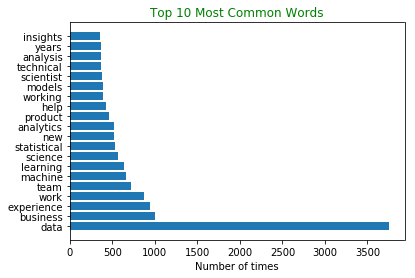

In [42]:
import matplotlib.pyplot as plt

top10 = dtm.sum().sort_values(ascending=False)[:20]
plt.title('Top 10 Most Common Words', color='green')
plt.xlabel('Number of times')
plt.barh(top10.index,list(top10));

In [39]:
# import seaborn as sns

# plt.figure(figsize=(9,5))
# sns.heatmap(, annot=True, linewidth=0.5);

TypeError: ignored

<Figure size 648x360 with 0 Axes>

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [0]:
data = [' '.join(x) for x in list(df['tokens'])]

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 20)

dtm = tfidf.fit_transform(data)
docs = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
docs.head()

,analysis,analytics,business,data,experience,help,insights,learning,machine,models,new,product,science,scientist,skills,solutions,statistical,team,technical,work
0,0.0,0.000000,0.000000,0.184901,0.427867,0.000000,0.0,0.247839,0.263777,0.292570,0.000000,0.00000,0.229826,0.000000,0.282707,0.0,0.000000,0.000000,0.617726,0.227625
1,0.0,0.000000,0.097013,0.302537,0.262530,0.359029,0.0,0.304137,0.323696,0.119676,0.232497,0.25909,0.188021,0.106281,0.000000,0.0,0.000000,0.378772,0.379023,0.186221
2,0.0,0.000000,0.527941,0.411599,0.000000,0.000000,0.0,0.183900,0.195727,0.434183,0.000000,0.00000,0.170535,0.385587,0.209773,0.0,0.202309,0.000000,0.000000,0.168902
3,0.0,0.000000,0.000000,0.388282,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.298392,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.729187,0.000000,0.478002
4,0.0,0.481366,0.387095,0.603581,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.504118,0.000000


 # 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [45]:
##### Your Code Here #####

#Load Bibloteca
from sklearn.neighbors import NearestNeighbors


nn = NearestNeighbors(n_neighbors=5,algorithm='ball_tree')

# Fit on TF-IDF Vectors
nn.fit(dtm.todense())

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [47]:
dream_job = ['netflix','amazon','hedgefund','blockchain', 'fintech']

jobs = [' '.join(dream_job)]
jobs

['netflix amazon hedgefund blockchain fintech']

In [48]:
new = tfidf.transform(jobs)

nn.kneighbors(new.todense())

(array([[1., 1., 1., 1., 1.]]), array([[278, 287, 289,  34, 325]]))

In [51]:
print(data[278])
print()
print(data[287])
print()
print(data[289])
print()
print(data[34])
print()
print(data[325])

icl-u-xs-mt--xs">temporary, marketing world leading team data scientists developing cutting edge solutions help customers entire buying journey enterprise offerings. team seeking build generation data science critical team marketing analytics, data, &amp; media organization. team builds first-of-a-kind capabilities advanced statistical modeling techniques scale business units geographies. team positioned bring marketing science level, substantial revenue outcomes data scientist interns work alongside marketing analytics experts develop scalable analytical solutions provide data-driven optimization insights ibm. interns work large, complex data sets extract knowledge insights solve difficult, non-routine analysis problems, applying advanced analytical methods needed. interns conduct end-to-end analysis includes industry research, data gathering requirements specification, processing, analysis, ongoing deliverables, marketing data scientist intern, work collaboratively, team, project add

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.